In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("cocktail_dataset.json")
data.set_index('id', inplace=True)

FileNotFoundError: File cocktail_dataset.json does not exist

Zbadam teraz głębiej same skłądniki. Robię z nich DataFrame.

In [57]:
ingredients = []
for i in data.ingredients:
    if i:
        for j in i:
            ingredients.append(j)
ingredients = pd.DataFrame(ingredients)
ingredients.set_index('id', inplace=True)
ingredients.head()

ingredients.drop(columns=['createdAt', 'updatedAt', 'imageUrl'], inplace=True)

In [58]:
ingredients.head()

,name,description,alcohol,type,percentage,measure
id,,,,,,
170,Soda water,None,1,None,NaN,NaN
305,Light Rum,"Light rums, also referred to as ""silver"" or ""w...",1,Rum,NaN,2-3 oz
312,Lime,"A lime (from French lime, from Arabic līma, fr...",0,Fruit,NaN,Juice of 1
337,Mint,Lamiaceae (/ˌleɪmiˈeɪsiˌaɪ/ or /ˌleɪmiˈeɪsiiː/...,0,Flower,NaN,2-4
476,Sugar,"Sugar is the generic name for sweet-tasting, s...",0,None,NaN,2 tsp


In [59]:
ingredients.isna().sum()

name             0
description    224
alcohol          0
type           121
percentage     431
measure         35
dtype: int64

In [60]:
ingredients.shape

(531, 6)

In [61]:
ingredients.describe()

,alcohol,percentage
count,531.000000,100.000000
mean,0.467043,36.060000
std,0.499383,7.568969
min,0.000000,13.000000
25%,0.000000,37.250000
50%,0.000000,40.000000
75%,1.000000,40.000000
max,1.000000,40.000000


Usuwam description, ponieważ większość jest pusta i zawiera sam tekst.

In [62]:
ingredients.drop(columns=['description'], inplace=True)

In [63]:
ingredients.head()

,name,alcohol,type,percentage,measure
id,,,,,
170,Soda water,1,None,NaN,NaN
305,Light Rum,1,Rum,NaN,2-3 oz
312,Lime,0,Fruit,NaN,Juice of 1
337,Mint,0,Flower,NaN,2-4
476,Sugar,0,None,NaN,2 tsp


Ciekawym jest fakt, że Soda water posiada status alcohol: 1 ale nie będe tego kwestionował

measure
1 oz             70
1 1/2 oz         53
1/2 oz           53
1                48
2 oz             44
                 ..
1 wedge           1
2-3 drops         1
Coarse            1
1 1/4 tsp         1
1/2 oz cream      1
Name: count, Length: 72, dtype: int64


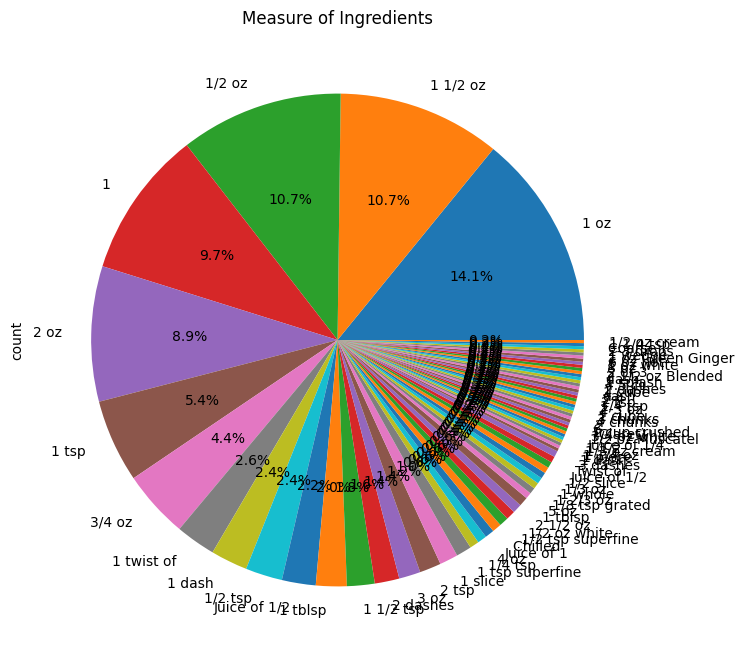

In [64]:
print(ingredients['measure'].value_counts())

# pie chart
plt.figure(figsize=(8,8))
ingredients['measure'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Measure of Ingredients')
plt.show()

Ze względu na dużą ilość, 72 różnych jednostek miar odpuszcze sobię analizę tego.

In [65]:
ingredients.drop(columns=['measure'], inplace=True)

In [66]:
ingredients.head()

,name,alcohol,type,percentage
id,,,,
170,Soda water,1,None,NaN
305,Light Rum,1,Rum,NaN
312,Lime,0,Fruit,NaN
337,Mint,0,Flower,NaN
476,Sugar,0,None,NaN


percentage
40.0    74
28.0    12
24.0     5
14.0     4
35.0     2
13.0     2
38.0     1
Name: count, dtype: int64


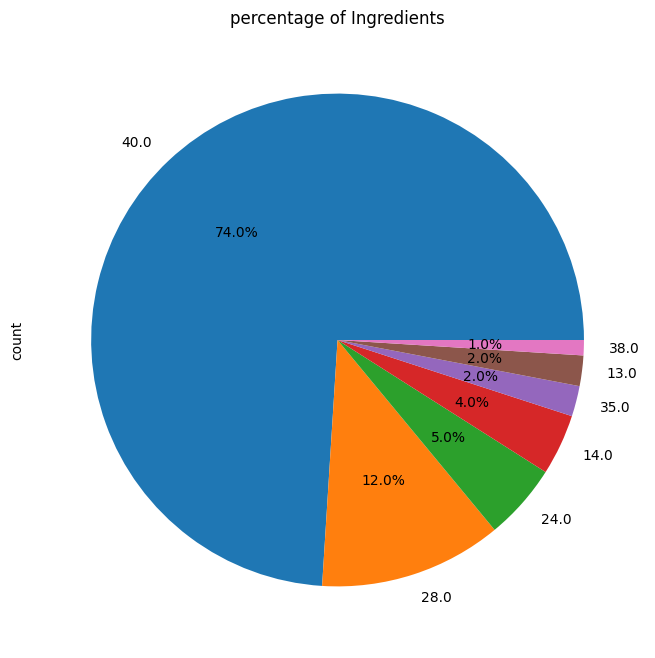

In [67]:
print(ingredients['percentage'].value_counts())

# pie chart
plt.figure(figsize=(8,8))
ingredients['percentage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('percentage of Ingredients')
plt.show()

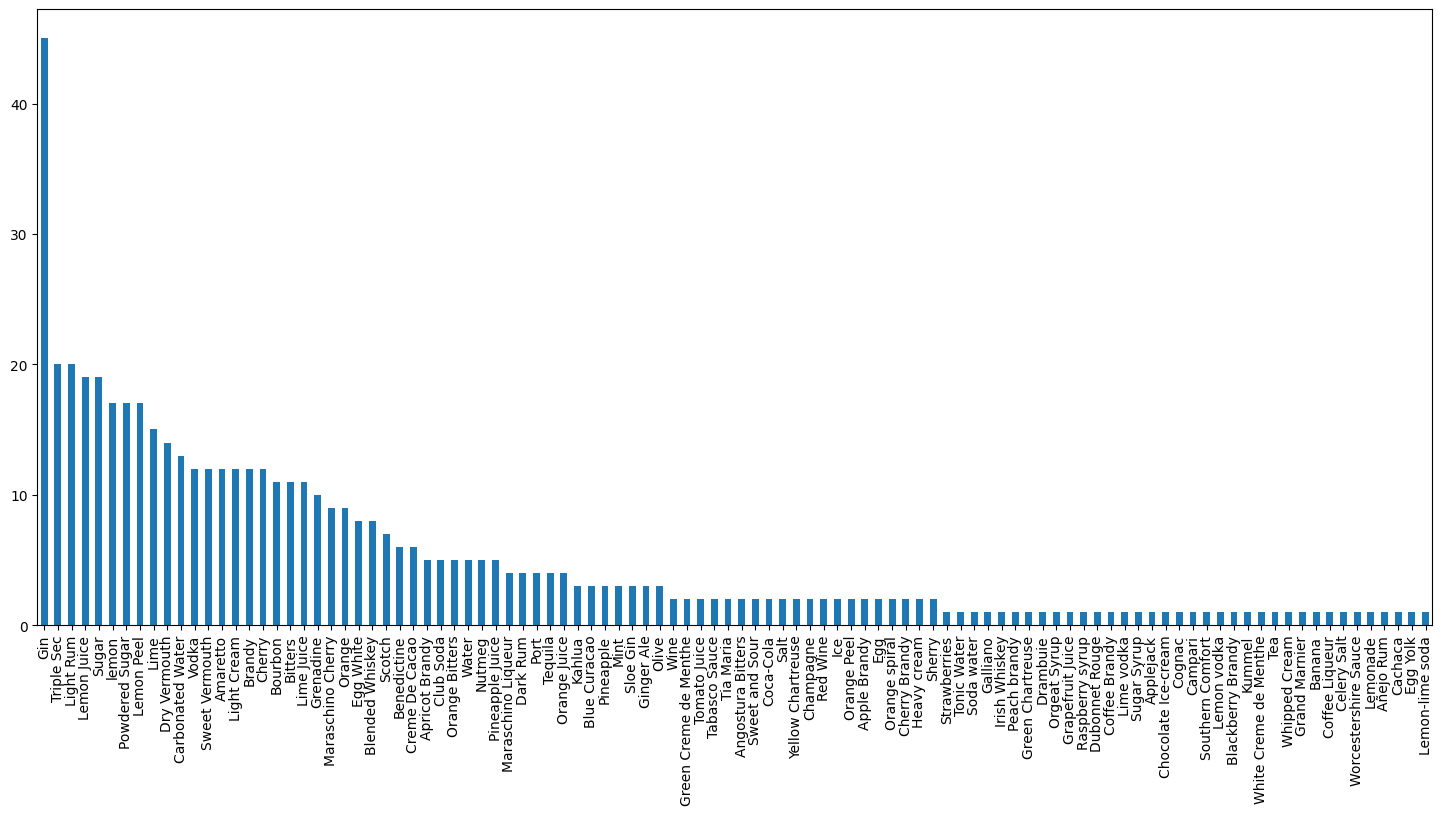

Gin                45
Triple Sec         20
Light Rum          20
Lemon Juice        19
Sugar              19
                   ..
Lemonade            1
Añejo Rum           1
Cachaca             1
Egg Yolk            1
Lemon-lime soda     1
Name: count, Length: 102, dtype: int64


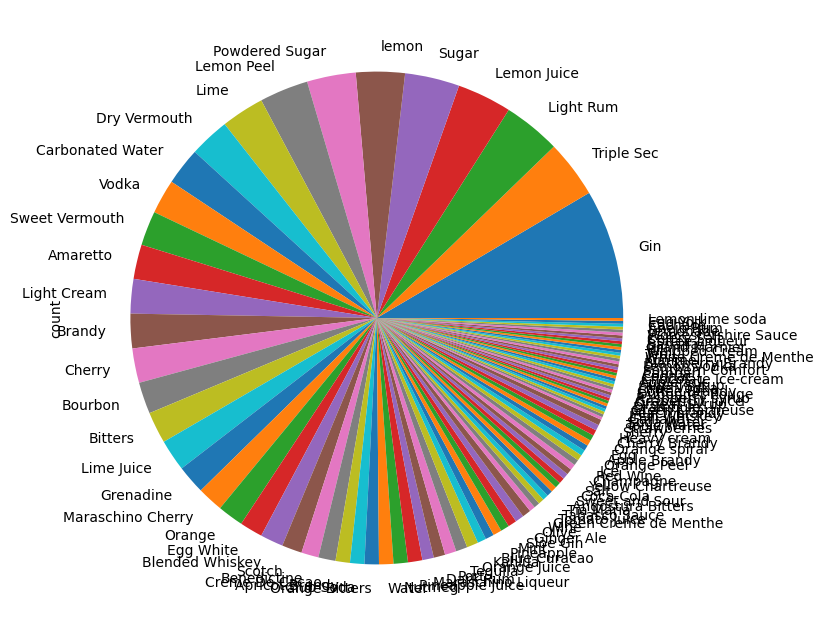

In [69]:
# histogram kolumny - ingredients
ingredients = []
for i in data.ingredients:
    if i:
        for j in i:
            ingredients.append(j['name'])
ingredients = pd.Series(ingredients)
plt.figure(figsize=(18, 8))
ingredients.value_counts().plot(kind='bar')
plt.show()
print(ingredients.value_counts())

plt.figure(figsize=(18, 8))
ingredients.value_counts().plot(kind='pie')
plt.show()
